In [1]:
from objects import objects_new2 as obj
from animation import animation as anim

In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.path as path
import matplotlib.lines as lines
import matplotlib.animation as animation
import math
from scipy.stats import norm
import pickle
import io
import time
import gc

In [3]:
# def data_init():
np.random.seed(19680801)
n_population = int(1e6)
mean_of_popul = 165
std_of_popul = 8
population = std_of_popul*np.random.randn(n_population) + mean_of_popul
n_try = 10000
sample_size = 50    
data_to_plot = np.zeros(n_try)
n_bins = 15

# First simples ---------------------------------------------------------------------------------


# Hist ---------------------------------------------------------------------------------

for i in range(n_try):
    data_to_plot[i] = np.mean(np.random.choice(population,sample_size))

xlim = [math.floor(data_to_plot.min()), math.floor(data_to_plot.max())+1]
bins = range(int(xlim[0]),int(xlim[1])+1)
bins = np.linspace(xlim[0],xlim[1]+1,(xlim[1]+2-xlim[0])*2-1)
n, bins = np.histogram(data_to_plot, bins)
x_ticks = np.linspace(100,200,101)
# Pdf

x = np.linspace(bins[0]-10,bins[-1]+10,5000)
mean = mean_of_popul
std = std_of_popul/np.sqrt(sample_size)
scale = np.sum(n)/2
max_pdf = norm.pdf(mean,mean,std)
center = 167

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


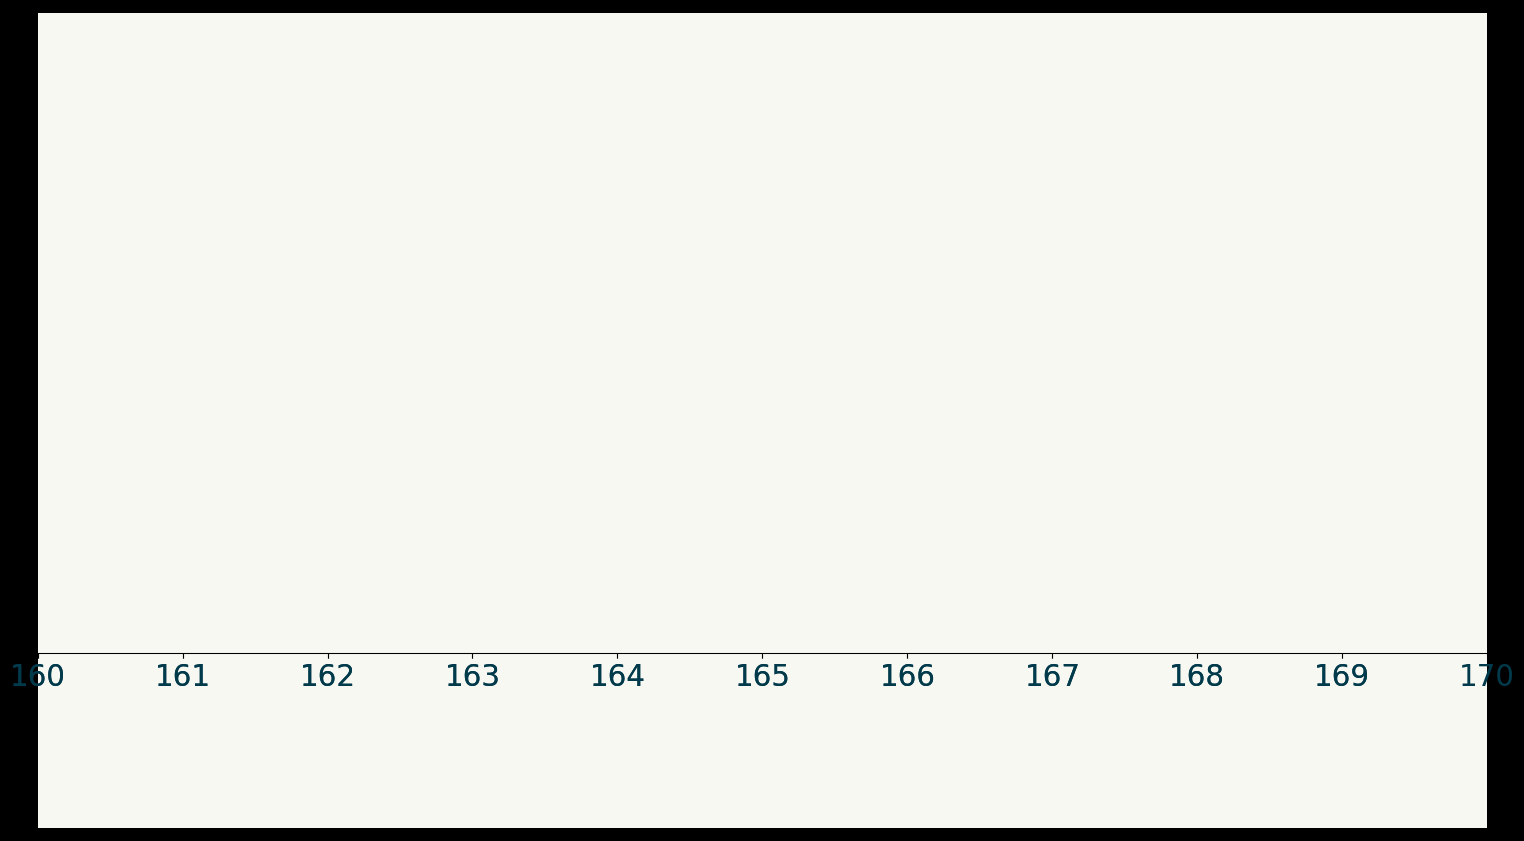

In [4]:
my_dpi = 96
frame = obj.Frame(my_dpi=my_dpi)
frame.axes.set_xlim(xlim)
frame.axes.set_xticks(bins.astype('int'))
frame.axes.set_ylim(-0.3 * max_pdf, 1.1 * max_pdf)
frame.update_axes_ratio()

hist = obj.Hist(bins, n, data_to_plot)
norm_pdf = obj.Dist_norm(mean, std, x, norm.pdf)
point1 = obj.Point(x=data_to_plot[0], rx=0.3)
point2 = obj.Point(x=data_to_plot[1], rx=0.3)
frame.add_objects([hist, norm_pdf, point1, point2])

In [5]:
actions = {}
scene = anim.Scene(frame.fig, [], fps = 60)

# Point 1 app
t_begin = 0.5
t_end = t_begin + 0.75
actions['p1_app'] = point1.appear(t_begin, t_end) 
scene.add_actions([actions['p1_app']])

# Point 2 app
t_begin = actions['p1_app'].end_time + 1
t_end = t_begin + 0.75
actions['p2_app'] = point2.appear(t_begin, t_end) 
scene.add_actions([actions['p2_app']])

# Hist
t_begin = actions['p2_app'].end_time + 1
t_end = t_begin + 2
actions['hist_app'] = hist.appear_down_to_up(t_begin, t_end) 
scene.add_actions([actions['hist_app']])

# Points disapp
t_begin = actions['hist_app'].end_time + 1
t_end = t_begin + 0.75
actions['p1_disapp'] = point1.disappear(t_begin, t_end) 
scene.add_actions([actions['p1_disapp']])
actions['p2_disapp'] = point2.disappear(t_begin, t_end) 
scene.add_actions([actions['p2_disapp']])

# Pdf app
t_begin = actions['p2_disapp'].end_time + 1
t_end = t_begin + 2
actions['pdf_app'] = norm_pdf.pdf_appear_left_to_right(t_begin, t_end, frame) 
scene.add_actions([actions['pdf_app']])

# Point 1 app
t_begin = actions['pdf_app'].end_time + 1
t_end = t_begin + 0.75
actions['p1_app_2'] = point1.appear(t_begin, t_end) 
scene.add_actions([actions['p1_app_2']])

# Hist disapp
t_begin = actions['p1_app_2'].end_time + 1
t_end = t_begin + 1.5
actions['hist_disapp_u2d'] = hist.disappear_up_to_down(t_begin, t_end) 
scene.add_actions([actions['hist_disapp_u2d']])
actions['hist_disapp_trans'] = hist.disappear_trans(t_begin, t_end) 
scene.add_actions([actions['hist_disapp_trans']])

# Zoom
t_begin = actions['hist_disapp_trans'].end_time + 1
t_end = t_begin + 2.5
actions['zoom'] = frame.zoom(t_begin, t_end, data_to_plot[0] - 10, data_to_plot[0] + 10,
                            -max_pdf) 
scene.add_actions(actions['zoom'])

# Moving pdf to 162
t_begin = actions['zoom'][0].end_time + 1
t_end = t_begin + 1
actions['move162'] = norm_pdf.move(t_begin, t_end, 162.) 
scene.add_actions([actions['move162']])
speed = np.abs((data_to_plot[0] - 162))

# Moving pdf to 174
t_begin = actions['move162'].end_time + 1
t_end = t_begin + (174-162)/(speed * 1.5)
actions['move174'] = norm_pdf.move(t_begin, t_end, 174.) 
scene.add_actions([actions['move174']])

# Moving pdf to 170
t_begin = actions['move174'].end_time + 1
t_end = t_begin + (174-170)/(speed)
actions['move170'] = norm_pdf.move(t_begin, t_end, 170.) 
scene.add_actions([actions['move170']])

# Moving pdf to center
t_begin = actions['move170'].end_time + 1
t_end = t_begin + 1.5
actions['move_c'] = norm_pdf.move(t_begin, t_end, center) 
scene.add_actions([actions['move_c']])

# Point disapp
t_begin = actions['move_c'].end_time + 1
t_end = t_begin + 0.75
actions['p1_disapp2'] = point1.disappear(t_begin, t_end) 
scene.add_actions([actions['p1_disapp2']])

# ticks disapp
t_begin = actions['p1_disapp2'].end_time + 1
t_end = t_begin + 0.75
actions['ticks_disapp'] = frame.ticks_disappear(t_begin, t_end)
scene.add_actions([actions['ticks_disapp']])

# Mean line appear
t_begin = actions['ticks_disapp'].end_time + 1
t_end = t_begin + 0.75
actions['ml_appear'] = norm_pdf.mean_line_appear(t_begin, t_end)
scene.add_actions([actions['ml_appear']])

# Area appear
t_begin = actions['ml_appear'].end_time + 1
t_end = t_begin + 1
actions['area_appear'] = norm_pdf.area_appear_from_mean(t_begin, t_end, 0.05)
actions['ml_change_alpha'] = norm_pdf. mean_line_change_alpha(t_begin, t_end, 0.5)
scene.add_actions([actions['area_appear'], actions['ml_change_alpha']])

# # Text appear
# t_begin = actions['ml_appear'].end_time + 1
# t_end = t_begin + 1
# actions['text_appear'] = norm_pdf.area.appear_text(t_begin, t_end)
# scene.add_actions([actions['text_appear']])

# Moving pdf to center
t_begin = actions['area_appear'].end_time + 3
t_end = t_begin + 1.5
actions['t'] = norm_pdf.move(t_begin, t_end, 162) 
scene.add_actions([actions['t']])

scene.run(dpi=my_dpi,file_name='test.mp4')#,times=[29.,100])

In [6]:
plt.draw()
plt.show()

<Figure size 432x288 with 0 Axes>

In [7]:
norm_pdf.texts

{'left': '', 'center': '', 'right': ''}